# Tarefa 2: Implementação da Rede Neural
Nesta tarefa você deve implementar uma rede neural com duas camadas totalmente conectadas. O treinamento e a validação deverão ser executados no CIFAR-10. 


In [1]:
# Configuração inicial

import numpy as np
import matplotlib.pyplot as plt

from rncvc.classifiers.neural_net import NeuralNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Permite a recarga automática de arquivos python importados
# dúvidas veja: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ retorna erro relativo """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

Implemente a rede neural na classe `NeuralNet` no arquivo `rncvc/classifiers/neural_net.py`. Os parâmetros (pesos) da rede são armazenados na variável (dicionário) `self.params`, onde as chaves são os nomes (string) das camadas e os valores são numpy arrays com os pesos. A seguir, inicializamos dados sintéticos e uma rede simplificada para guiar o procedimento de desenvolvimento. 

In [2]:
# Criação de um modelo e um conjunto de dados para alguns testes.
# Definimos um seed para que seja possivel a conferência dos resultados.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return NeuralNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward: calcule valores de predição para as classes
A função `NeuralNet.loss` utiliza os dados e os parâmetros para calcular as predições para cada classe. Além disso, são calculados: o valor da função de custo e os gradientes dos parâmetros. 

Implemente a primeira parte, que faz a predição das classes. 

In [3]:
scores = net.loss(X, reg=0.1)
print 'Suas predicoes:'
print scores
print
print 'Predicoes corretas:'
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print correct_scores
print

# A diferenca deve ser pequena. Normalmente < 1e-7
print 'Diferenca entre sua implementacao e os valores corretos:'
print np.sum(np.abs(scores - correct_scores))

Suas predicoes:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Predicoes corretas:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Diferenca entre sua implementacao e os valores corretos:
3.68027207459e-08


# Forward: calcule a função de custo

Na mesma função, implemente a segunda parte, calculando os valores da função de custo.

In [4]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# deve ser pequena a diferenca, normalmente < 1e-12
print 'Diferença da sua funcao de custo e do custo correto:'
print np.sum(np.abs(loss - correct_loss))

Diferença da sua funcao de custo e do custo correto:
1.79634085384e-13


# Backward

Implemente o restante da função. Aqui os gradientes com respeito às variáveis `W1`, `b1`, `W2`, e `b2` devem ser calculados. 
Com uma implementação correta de todo o processo de backward você deve ser capaz de conferir utilizando o gradiente numérico.

In [5]:
from rncvc.gradient_check import eval_numerical_gradient

# Use o gradiente numérico para verificar sua implementação da etapa backward.
# Se sua implementação estiver correta, a diferença entre os gradientes será 
# inferior a 1e-8 para cada um das camadas de pesos: W1, W2, b1, b2.

loss, grads = net.loss(X, y, reg=0.1)

# as diferenças devem ser pequenas (<1e-8)
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
  print '%s erro relativo max: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

W1 erro relativo max: 8.570008e-09
W2 erro relativo max: 3.440708e-09
b2 erro relativo max: 3.865070e-11
b1 erro relativo max: 1.555470e-09


# Treinando a rede (modelo toy)

Para treinar, utilize o SGD. Preencha os espaços em branco da função NeuralNet.train. Ainda, você precisa implementar a função NeuralNet.predict utilizada para verificar acurácia durante o treinamento. 

Com a implementação completa, executando o código abaixo, você deve ser capaz de obter o valor da função de custo próximo a 0.2.


Loss de treinamento:  0.114048343474


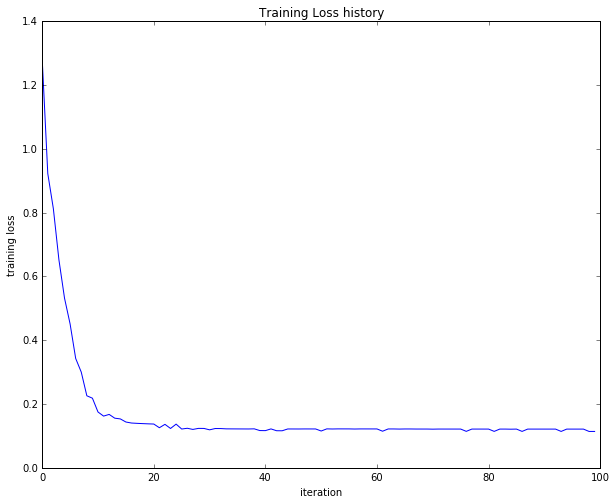

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=0.1,
            num_iters=100, verbose=False)

print 'Loss de treinamento: ', stats['loss_history'][-1]

# plotagem dos valores de custo durante o treinamento
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Carregando o CIFAR-10
Com sua implementação completa (e correta), podemos carregar os dados do CIFAR-10 e usá-los para treinar um modelo de rede neuralem dados reais.  


In [7]:
from rncvc.data_utils import load_CIFAR10, save_model, load_model

def get_CIFAR10_data():
    """
    Carregando o CIFAR-10 e efetuando pré-processamento para preparar os dados
    para entrada na Rede Neural.     
    """
    # Carrega o CIFAR-10
    cifar10_dir = 'rncvc/datasets/cifar-10-batches-py'    
    X_train, y_train, X_valid, y_valid = load_CIFAR10(cifar10_dir)   

    # Normalizacao dos dados: subtracao da imagem media
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_valid -= mean_image
    
    print X_train.shape
    print X_valid.shape
    
    # Imagens para linhas 
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_valid = X_valid.reshape(X_valid.shape[0], -1)    

    return X_train, y_train, X_valid, y_valid


# Utiliza a funcao acima pra carregar os dados.
X_train, y_train, X_valid, y_valid = get_CIFAR10_data()
print 'Shape dados treinamento: ', X_train.shape
print 'Shape das classes (treinamento): ', y_train.shape
print 'Shape dados validacao: ', X_valid.shape
print 'Shape das classes (validacao): ', y_valid.shape

(40000, 32, 32, 3)
(10000, 32, 32, 3)
Shape dados treinamento:  (40000, 3072)
Shape das classes (treinamento):  (40000,)
Shape dados validacao:  (10000, 3072)
Shape das classes (validacao):  (10000,)


# Treinando a Rede no CIFAR-10
Para treinar a rede use SGD com momentum. Salve o melhor modelo com a função data_utils.save_model().

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = NeuralNet(input_size, hidden_size, num_classes)

# Treina a rede
stats = net.train(X_train, y_train, X_valid, y_valid,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Efetua predicao no conjunto de validacao
val_acc = (net.predict(X_valid) == y_valid).mean()
print 'Acuracia de validacao: ', val_acc

# Salva o modelo da rede treinada
model_path = 'model.bin'
save_model(model_path, net)

iteration 0 / 1000: loss 2.302941
iteration 100 / 1000: loss 2.302882
iteration 200 / 1000: loss 2.301608
iteration 300 / 1000: loss 2.284509
iteration 400 / 1000: loss 2.235312
iteration 500 / 1000: loss 2.161680
iteration 600 / 1000: loss 2.143852
iteration 700 / 1000: loss 2.061105
iteration 800 / 1000: loss 2.003964
iteration 900 / 1000: loss 2.081777
Acuracia de validacao:  0.2587


True

# Acompanhando o treinamento

Com os hiperparâmetros definidos anteriormente você provavelmente não obterá bons resultados: a acurácia não deve passar de 30%. 

Uma estratégia para entender o que não está bom durante o treinamento é plotar os valores da função de custo e acurácia durante o treinamento. 

Outra estratégia é visualizar os pesos aprendidos na primeira camada durante o processo de otimização. Normalmente, redes treinadas em dados visuais apresentam padrões estruturais visíveis na primeira camada.


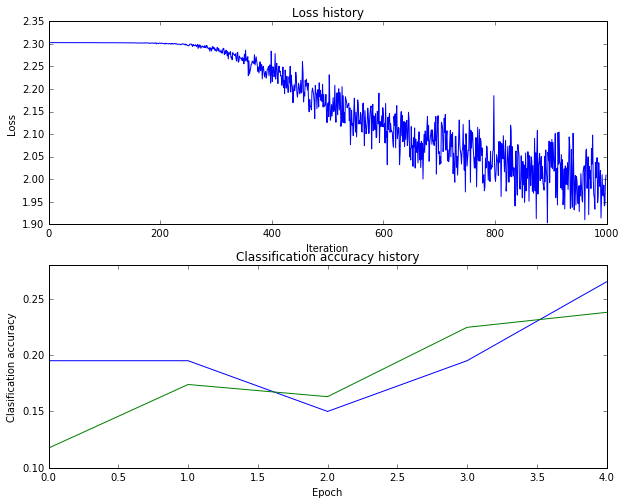

In [9]:
# Plota a função de custo e acurácia
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

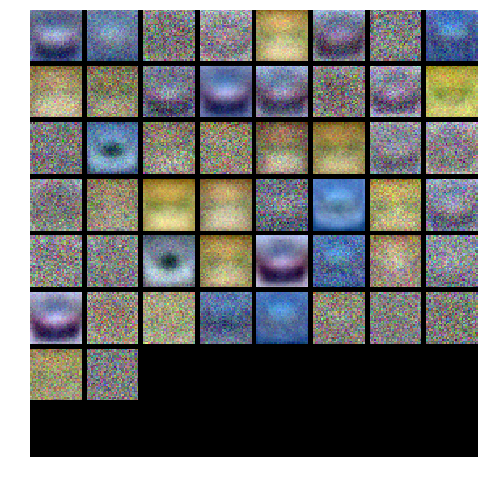

In [10]:
from rncvc.vis_utils import visualize_grid

# Visualiza os pesos da rede

def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(net)

# Desafio RNCVC 2016

**Dicas**
* Tune os hiperparâmetros (taxa de aprendizado, número de neurônios, etc). 
* Use validação cruzada para achar os melhores hiperparâmetros.
* Regularize o modelo: teste o uso de Regularização L2 e Dropout. 
* Utilize um esquema mais sofisticado de atualização dos pesos (ex: SGD + Momentum, Nesterov, Adadelta, Adam, RMSProp).
* Salve o melhor modelo obtido usando data_utils.save_model() e data_utils.load_model() para abrir.


Para o desafio: é <b>fundamental</b> que o trecho abaixo seja executado sem problemas. 


In [13]:
# Assuma que o modelo é a classe NeuralNet serializada em disco usando data_utils.save_model()

best_model = 'rncvc/classifiers/best_model.py'
model = load_model(best_model)

# Retorna um vetor de predição (N x 1), onde N é o número de instâncias
# As classes retornadas aqui devem ser inteiros: [0, 1, 2, ..., C]
# Assuma que X_teste e uma matriz de instancias (N_test, D) 
# Voce nao tera o X_teste oficial, use outro conjunto para validar.
predicted_classes = model.predict(X_test)

IOError: [Errno 2] No such file or directory: 'path/to/best_model'

Reporte abaixo os valores de acurácia no treino e validação do modelo enviado para o desafio.

In [ ]:
# Treino: 00.00%
# Validacao: 00.00%